<a href="https://colab.research.google.com/github/Valepaz13/Syllabus/blob/main/Tarea_IA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!gdown 1ZV_nCUfuitYz0vpKFhg5wdwz_LlaVQVo
!unzip 'Avengers 1.zip'

Downloading...
From: https://drive.google.com/uc?id=1ZV_nCUfuitYz0vpKFhg5wdwz_LlaVQVo
To: /content/Avengers 1.zip
100% 381M/381M [00:08<00:00, 42.6MB/s]
Archive:  Avengers 1.zip
replace Avengers 1/black_widow/face_103425_0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=e300d5fac62b57bdee599af4d6843fe3db228d1fe3c406c546eb0721bebee041
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [31]:
from scipy.__config__ import show
import face_recognition as fr
import pandas as pd
from os import listdir
from os.path import join
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Clase que utilizaremos para un clasificador SVM
from sklearn.svm import SVC
# Clase que utilizaremos para un clasificador Bayesiano ingenuo
from sklearn.naive_bayes import GaussianNB
# Clase que utilizaremos para un clasificador de arbol de decision
from sklearn.tree import DecisionTreeClassifier
from random import randint
import numpy as np
#Librerias de visualización:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

root = "Avengers 1"
# Con este comando vemos todos los subdirectorios y archivos presentes en el directorio actual
lista_directorios = listdir(root)
# Con esto podemos obtener el nombre de la primera carpeta del directorio que corresponde a
# un nombre de un avenger , en este caso ' black_widow '
primera_carpeta = lista_directorios[0]
# Con esto tenemos la ruta donde se encuetran las fotos del primer Vengador
directorio_primer_avenger = join(root, primera_carpeta)

# Obtenemos una lista de los nombres de los archivos de las fotos presentes en la carpeta
lista_fotos_primer_avenger = listdir(directorio_primer_avenger)

primera_imagen = lista_fotos_primer_avenger[1]
ruta_imagen = join(directorio_primer_avenger , primera_imagen)


# Cargamos el archivo usando la libreria face_recognition
image = fr.load_image_file(ruta_imagen)

# Le calculamos los landmarks a la imagen del Vengador
face_landmarks_list = fr.face_landmarks(image)
print(type(image))
print ( f" Clase del Vengador : { primera_carpeta } \ nLandmarks del primer Vengador : {face_landmarks_list }")

<class 'numpy.ndarray'>
 Clase del Vengador : nick_fury \ nLandmarks del primer Vengador : [{'chin': [(3, 139), (13, 171), (24, 201), (38, 231), (59, 260), (86, 283), (120, 300), (157, 309), (192, 304), (222, 290), (242, 266), (254, 235), (261, 201), (263, 165), (259, 131), (251, 98), (241, 68)], 'left_eyebrow': [(32, 101), (45, 82), (66, 71), (90, 67), (115, 68)], 'right_eyebrow': [(149, 54), (164, 40), (183, 32), (203, 30), (219, 40)], 'nose_bridge': [(141, 85), (149, 103), (157, 121), (165, 140)], 'nose_tip': [(134, 167), (151, 168), (168, 169), (180, 160), (192, 151)], 'left_eye': [(64, 116), (75, 108), (89, 102), (105, 103), (93, 110), (79, 115)], 'right_eye': [(171, 84), (181, 76), (194, 72), (207, 73), (197, 80), (185, 83)], 'top_lip': [(122, 229), (139, 211), (157, 201), (171, 200), (181, 194), (199, 194), (214, 202), (207, 203), (184, 205), (173, 209), (160, 211), (130, 227)], 'bottom_lip': [(214, 202), (206, 227), (192, 240), (180, 246), (166, 249), (145, 246), (122, 229), (1

Los datos entregados corresponden a imagenes representadas como un arreglo representado por la clase numpy.ndarray, el cual contiene los pixeles de la imagen. Los landmarks identificados en los datos son: 'chin', 'left eyebrow', 'Right eyebrow', 'nose bridge', 'nose tip', 'left eye', 'right eye', 'top lip', 'bottom lip'.

In [4]:
#Lista en la cual se ira recopilando la cantidad de imagenes por cada carpeta
lista_avengers = []
#lista la cual contendra una imagen de cada carpeta ade avengers
lista_img_avengers = []
for avenger in lista_directorios:
  lista = [avenger]
  directorio_avenger = join(root, avenger)
  img_avenger = listdir(directorio_avenger)
  ruta_img = join(directorio_avenger, img_avenger[1])
  image_avenger = fr.load_image_file(ruta_img)
  lista_img_avengers.append((avenger,image_avenger))
  lista.append(len(img_avenger))
  lista_avengers.append(lista)

#se utiliza panda para imprimir una tabla con cada clase y la cantidad de instancias con la que cuenta
pd.DataFrame(lista_avengers, columns=['Avenger','Instancias'])

,Avenger,Instancias
0,nick_fury,231
1,iron_man,1854
2,hawkeye,378
3,black_widow,1138
4,hulk,976
5,captain_america,1194
6,thor,942


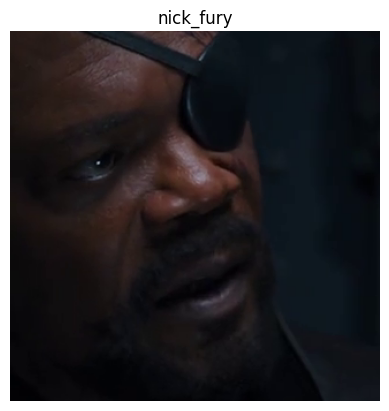

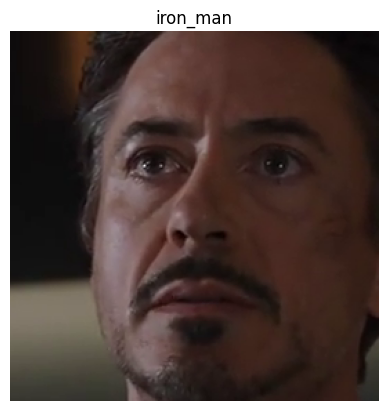

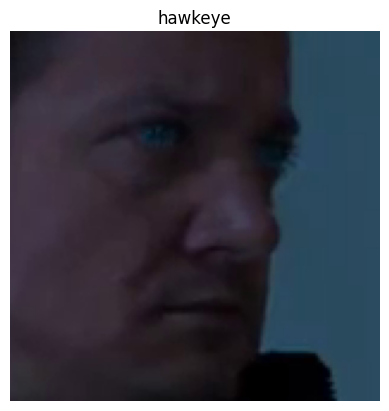

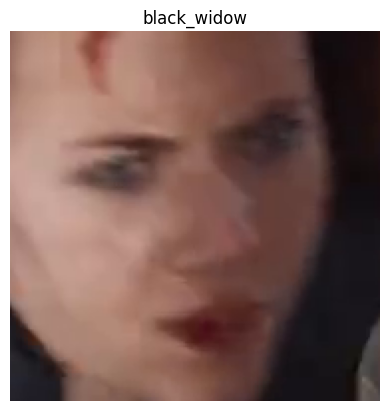

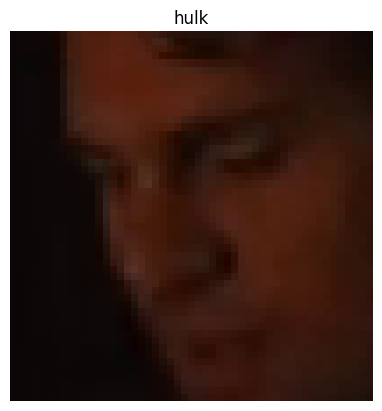

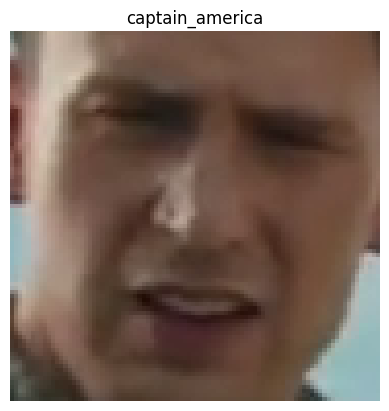

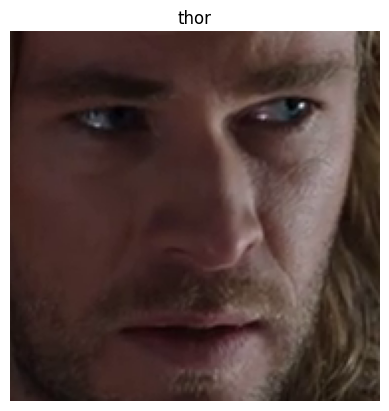

In [5]:
#se utiliza para imprimir las imagenes con su etiqueta respectiva
for imagen in lista_img_avengers:
  plt.imshow(imagen[1])
  plt.title(imagen[0])
  plt.axis('off')
  plt.show()

#2

In [6]:
#Creamos un diccionario que contendra los landmarks
dict_landmarks = {}

#Hay que recorrer cada imagen y calcular sus landmarks
for avenger in lista_directorios:
  directorio_avenger = join(root, avenger)
  img_avenger = listdir(directorio_avenger)
  for imagen in img_avenger:
    ruta_img = join(directorio_avenger, imagen)
    image_avenger = fr.load_image_file(ruta_img)
    face_landmarks_list = fr.face_landmarks(image_avenger)
    #se agregan los landmarks de cada imagen al diccionario
    dict_landmarks[ruta_img] = face_landmarks_list

#se crea el dataframe
df_landmarks = pd.DataFrame.from_dict(dict_landmarks, orient='index', columns=['Landmarks'])
# Obtener la etiqueta de cada imagen
##OpenAI(2023)

In [50]:
# Obtener la etiqueta de cada imagen
etiquetas = df_landmarks.index.str.split('/').str[-2]
df_landmarks['Etiqueta'] = etiquetas
#OpenAI(2023)

Index(['nick_fury', 'nick_fury', 'nick_fury', 'nick_fury', 'nick_fury',
       'nick_fury', 'nick_fury', 'nick_fury', 'nick_fury', 'nick_fury',
       ...
       'thor', 'thor', 'thor', 'thor', 'thor', 'thor', 'thor', 'thor', 'thor',
       'thor'],
      dtype='object', length=6713)


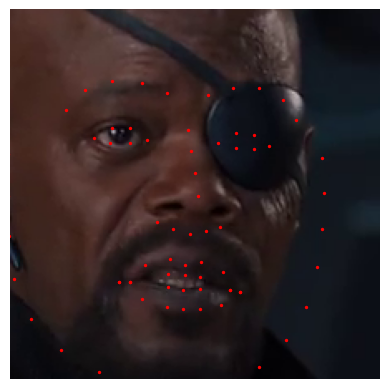

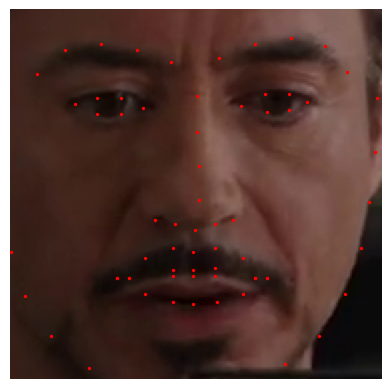

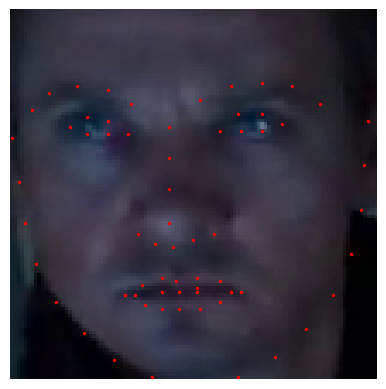

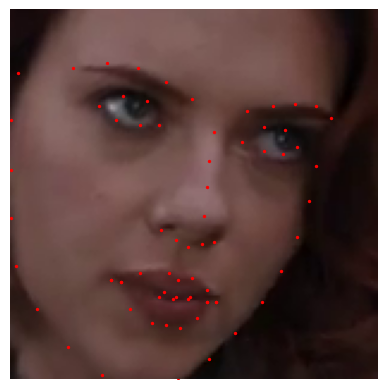

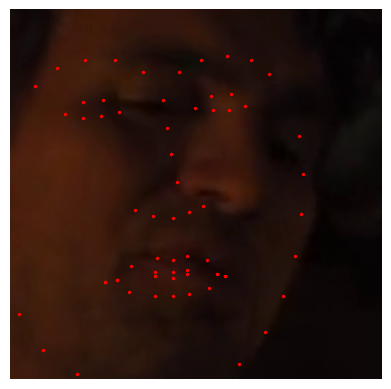

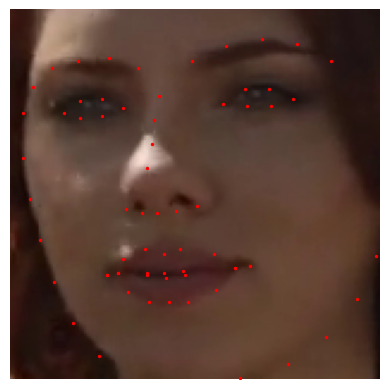

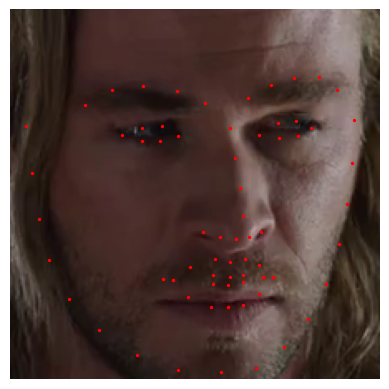

In [8]:
lista_carpetas = df_landmarks.index.map(lambda x: x.split('/')[1]).unique()

for carpeta in lista_carpetas:
    df_carpeta = df_landmarks.loc[df_landmarks.index.str.contains(f"/{carpeta}/")]

    # Obtén una fila aleatoria de la carpeta
    fila_aleatoria = df_carpeta.sample(n=1)
    ruta_imagen = fila_aleatoria.index[0]
    landmarks = fila_aleatoria['Landmarks'][0]

    # Carga la imagen utilizando face_recognition
    image = fr.load_image_file(ruta_imagen)

    # Muestra la imagen con los landmarks

    if landmarks is not None:

      for landmark_type, landmark_points in landmarks.items():
          for point in landmark_points:
              plt.scatter(point[0], point[1], color='red', s=2)

    #OpenAI(2023)
    #En el caso de que no reconozca los landmarks se busca una nueva imagen
    elif landmarks is None:
      a = 0
      while a==0:
        fila_aleatoria = df_carpeta.sample(n=1)
        ruta_imagen = fila_aleatoria.index[0]
        landmarks = fila_aleatoria['Landmarks'][0]

        image = fr.load_image_file(ruta_imagen)

        if landmarks is not None:
          a=1
          for landmark_type, landmark_points in landmarks.items():
              for point in landmark_points:
                  plt.scatter(point[0], point[1], color='red', s=2)
    plt.imshow(image)
    plt.axis('off')
    plt.show()


En el codigo anterior se hizo un dataframe que contuviera los landmarks de cada imagen, y se imprimio un ejemplo de cada clase. En el codigo se pudo observar que no todas las imagenes tenian landmarks, por lo cual se tuvo que agregar que en el caso de que la imagen no tuviera landmarks se buscara una nueva imagen. A continuación contaremos cuantas imagenes no tienen landmark.

In [27]:
#Filtramos las imagenes sin landmarks
imagenes_sin_landmarks = df_landmarks[df_landmarks['Landmarks'].isnull()]
print((imagenes_sin_landmarks))

                                       Landmarks   Etiqueta
Avengers 1/nick_fury/face_108682_0.png      None  nick_fury
Avengers 1/nick_fury/face_28315_0.png       None  nick_fury
Avengers 1/nick_fury/face_75796_0.png       None  nick_fury
Avengers 1/nick_fury/face_140812_0.png      None  nick_fury
Avengers 1/nick_fury/face_140686_0.png      None  nick_fury
...                                          ...        ...
Avengers 1/thor/face_66395_0.png            None       thor
Avengers 1/thor/face_74732_0.png            None       thor
Avengers 1/thor/face_119406_0.png           None       thor
Avengers 1/thor/face_67347_0.png            None       thor
Avengers 1/thor/face_63343_0.png            None       thor

[2048 rows x 2 columns]


Se deicido crear un dataframe eliminando las imagenes sin landmarks, para luego al momento de entrenar los datos hacer una comparación del dataframe con todos los datos y el dataframe filtrado.

In [34]:
#se deja un nuevo dataframe que solo contenga las imagenes con landmarks
df_img = df_landmarks.dropna(subset=['Landmarks'])
print(len(df_img))

4665


#3
Ahora toca diseñar las features. Para diseñarlas se decidio basarse en las proporciones de los rasgos de la cara, ya que no todas las imagenes se encuentran a la misma distancia, por lo que si se calcula la distancia entre los ojos, entre una imagen y otra puede variar mucho, dificultando la predicción. Por ello se dedice basarse en proporciones para realizar las features.

In [12]:
from pandas.io.formats.format import math
#función que calcula la distancia entre dos puntos
def distancia(p1,p2):
  x1,y1 = p1
  x2,y2 = p2
  dist = math.sqrt((y2-y1)**2 + (x2-x1)**2)
  return dist

In [13]:
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []
list7 = []
list8 = []
list9 = []
list10 = []


for ind, colum in df_img.iterrows():
  landmarks = colum['Landmarks']
  #Distancia entre ojos (1)
  dist_eyes = distancia(landmarks['right_eye'][0],landmarks['left_eye'][3])
  #Distancia entre cejas (2)
  dist_eyebrows = distancia(landmarks['right_eyebrow'][0],landmarks['left_eyebrow'][4])
  #Distancia nariz (3)
  dist_nose = distancia(landmarks['nose_bridge'][0],landmarks['nose_tip'][2])
  #Distancia labios horizontal(4)
  dist_lips = distancia(landmarks['top_lip'][0],landmarks['top_lip'][6])
  #Distancia labio inferios y barbilla (5)
  dist_lips_chin = distancia(landmarks['bottom_lip'][3],landmarks['chin'][8])
  #Distancia puente nariz labio superior (6)
  dist_nose_lips = distancia(landmarks['nose_bridge'][0],landmarks['top_lip'][3])
  #Distancia ojo izquierdo punta de la nariz (7)
  dist_lefteye_nose = distancia(landmarks['left_eye'][3],landmarks['nose_tip'][2])
  #Distancia ojo derecho punta de la nariz (8)
  dist_rigteye_nose = distancia(landmarks['right_eye'][0],landmarks['nose_tip'][2])
  #Distancia chin y ojo izquierdo (9)
  dist_chin_lefteye = distancia(landmarks['left_eye'][0],landmarks['chin'][0])
  #Distancia chin y ojo derecho (10)
  dist_chin_righteye  = distancia(landmarks['chin'][16],landmarks['right_eye'][3])
  #Distancia ceja izquierda y ojo izquierdo (11)
  dist_left_eyebrow_eye = distancia(landmarks['left_eyebrow'][4],landmarks['left_eye'][3])
  #Distancia ceja derecha y ojo derecho (12)
  dist_right_eyebrow_eye  = distancia(landmarks['right_eyebrow'][0],landmarks['right_eye'][0])
  #Distancia ceja izquierda y chin (13)
  dist_left_eyebrow_chin = distancia(landmarks['left_eyebrow'][0],landmarks['chin'][8])
  #Distancia ceja derecha y chin (14)
  dist_right_eyebrow_chin  = distancia(landmarks['right_eyebrow'][4],landmarks['chin'][8])

  #Ahora calculamos las proporciones y las agregamos a una lista
  #prop 1 y 2
  #Proporciona información sobre el ancho del área de los ojos en relación con las cejas.
  list1.append(dist_eyes/dist_eyebrows)
  #prop 1 y 3
  #indica si la nariz es proporcionalmente más corta o más larga en comparación con la distancia entre los ojos.
  list2.append(dist_eyes/dist_nose)
  #prop 3 y 4
  #indica si la boca es más ancha o estrecha en comparación con la altura de la nariz.
  list3.append(dist_nose/dist_lips)
  #prop 5 y 6
  #indica si los labios están ubicados más cerca de la nariz o más cerca de la barbilla en relación con la altura facial.
  list4.append(dist_lips_chin/dist_nose_lips)
  #prop 7 y 8
  #indica si los ojos están ubicados de manera más similar o diferente con respecto a la nariz.
  list5.append(dist_lefteye_nose/dist_rigteye_nose)
  #prop 9 y 10
  #indica si los ojos están ubicados de manera más similar o diferente con respecto a la barbilla.
  list6.append(dist_chin_lefteye/dist_chin_righteye)
  #prop 7 y 9
  #indica si el ojo izquierdo está ubicado más cerca de la nariz o de la barbilla en comparación con su posición general en el rostro.
  list7.append(dist_lefteye_nose/dist_chin_lefteye)
  #prop 8 y 10
  #indica la posición relativa del ojo derecho en relación con la distancia desde el ojo derecho hasta la nariz y la barbilla.
  list8.append(dist_rigteye_nose/dist_chin_righteye)
  #prop 11 y 13
  #indica si el ojo izquierdo está ubicado más cerca de la ceja izquierda o de la barbilla en comparación con su posición general en el rostro.
  list9.append(dist_left_eyebrow_eye/dist_left_eyebrow_chin)
  #prop 12 y 14
  #indica la posición relativa del ojo derecho en relación con la distancia desde el ojo derecho hasta la ceja derecha y la barbilla.
  list10.append(dist_right_eyebrow_eye/dist_right_eyebrow_chin)

In [72]:
#Se adjuntan las etiquetas en la lista 0, para posteriormente agregarlas al dataframe
lista0 = []
etiquetas = df_img['Etiqueta']
for etiqueta in etiquetas:
  lista0.append(etiqueta)

In [73]:
dataframe = pd.DataFrame({'Etiquetas': lista0,'Prop_ojos_cejas':list1,'Prop_ojos_nariz':list2,
                          'Prop_nariz_labios':list3,'Prop_labioschin_narizlabios':list4,'Prop_ojosIzDer_nariz':list5,
                          'dist_ojosIzDer_chin':list6,'dist_ojos_nariz_chinIzq':list7,'dist_ojos_nariz_chinDer':list8,
                          'dist_left_ceja_ojo_chin':list9,'dist_Right_ceja_ojo_chin':list10})

Las features elegidas buscan capturar la relación de los rasgos faciales principales, como lo sería el tamaño de los ojos, la nariz, labios, entre otros. Se elegirion proporciones, ya que, proporciona información acerca de la simetria de los rasgos faciales y en el caso de que la cara en la foto se encuentre más alejada o cerca, no deberia afectar la proporción, lo cual nos da una mayor certeza al recopilar los datos particulares de cada avenger. Todos las features son proporciones que ayudan a identificar la ubicación de los rasgos faciales respecto a otros, como la separación de los ojos, la proporción de la nariz y la boca, la posición de los labios y la simetría facial.

#4

Para esta parte, primero se dividir las imagenes en conjuntos, se dividiran en entrenamiento, prueba y validación. El primero se utiliza para entrenar el modelo y este vaya aprendiendo a reconocer las caracteristicas de los datos, por lo cual es importante que este conjunto tenga una gran cantidad de datos, por lo que se le asignara un 75% de los datos. Luego el conjunto de prueba se utiliza para evaluar el rendimiento final y objetivo del modelo en cuestión, es importante que este conjunto no sea tan pequeño para no obtener una estimación poco confiable del módelo, por lo que se le asigna un 15% de los datos. Por último el conjunto de validación se utiliza para ajustar los hiperparametros y evaluar el rendimiento del modelo, a este se le asignan el resto de los datos que serian un 10%.

In [74]:
#features
x = dataframe.loc[:, dataframe.columns != 'Etiquetas']
#Etiquetas
y = dataframe.loc[:, 'Etiquetas']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=50)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.12, random_state=50)

A continuación se entrenaran los modelos de las familias, ajustando los hiperparametros para conseguir el mejor modelo.

In [ ]:
#Desicion Tree

clf = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
clf = clf.fit(X_train, y_train)